## Data Fest Project

Team members: Arthur Melo, Ben Marrilla, Pranjal, Vanessa

In [1]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load CSV files


# Load Leases dataset
leases = pd.read_csv('Leases.csv')


major_occupancy = pd.read_csv('Major Market Occupancy Data-revised.csv')

price_availability = pd.read_csv('Price and Availability Data.csv')

# Load Unemployment dataset
unemployment = pd.read_csv('Unemployment.csv')

In [3]:
print("major occupancy dataset columns:", major_occupancy.columns.tolist())

major occupancy dataset columns: ['year', 'quarter', 'market', 'ending_occupancy_proportion', 'starting_occupancy_proportion', 'avg_occupancy_proportion']


In [4]:
print("leases dataset columns:", leases.columns.tolist())

leases dataset columns: ['year', 'quarter', 'monthsigned', 'market', 'building_name', 'building_id', 'address', 'region', 'city', 'state', 'zip', 'internal_submarket', 'internal_class', 'leasedSF', 'company_name', 'internal_industry', 'transaction_type', 'internal_market_cluster', 'costarID', 'space_type', 'CBD_suburban', 'RBA', 'available_space', 'availability_proportion', 'internal_class_rent', 'overall_rent', 'direct_available_space', 'direct_availability_proportion', 'direct_internal_class_rent', 'direct_overall_rent', 'sublet_available_space', 'sublet_availability_proportion', 'sublet_internal_class_rent', 'sublet_overall_rent', 'leasing']


In [5]:
print("unemployment dataset columns:", unemployment.columns.tolist())

unemployment dataset columns: ['year', 'quarter', 'month', 'state', 'unemployment_rate']


In [6]:
print("price availabilty dataset columns:", price_availability.columns.tolist())

price availabilty dataset columns: ['year', 'quarter', 'market', 'internal_class', 'RBA', 'available_space', 'availability_proportion', 'internal_class_rent', 'overall_rent', 'direct_available_space', 'direct_availability_proportion', 'direct_internal_class_rent', 'direct_overall_rent', 'sublet_available_space', 'sublet_availability_proportion', 'sublet_internal_class_rent', 'sublet_overall_rent', 'leasing']


In [7]:
# Display the first few rows and summaries for each dataset
leases.head()
#leases.describe()

,year,quarter,monthsigned,market,building_name,building_id,address,region,city,state,...,overall_rent,direct_available_space,direct_availability_proportion,direct_internal_class_rent,direct_overall_rent,sublet_available_space,sublet_availability_proportion,sublet_internal_class_rent,sublet_overall_rent,leasing
0,2018,Q1,1.0,Atlanta,10 Glenlake North Tower,Atlanta_Central Perimeter_Atlanta_10 Glenlake ...,10 Glenlake Pky NE,South,Atlanta,GA,...,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0
1,2018,Q1,1.0,Atlanta,100 City View,Atlanta_Northwest_Atlanta_100 City View_3330 C...,3330 Cumberland Blvd,South,Atlanta,GA,...,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0
2,2018,Q1,1.0,Atlanta,1000 Parkwood,Atlanta_Northwest_Atlanta_1000 Parkwood_1000 P...,1000 Parkwood Cir SE,South,Atlanta,GA,...,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0
3,2018,Q1,1.0,Atlanta,1100 Circle 75,Atlanta_Northwest_Atlanta_1100 Circle 75_1100 ...,1100 Circle 75 Pky SE,South,Atlanta,GA,...,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,715742.0
4,2018,Q1,1.0,Atlanta,1200 Ashwood,Atlanta_Central Perimeter_Atlanta_1200 Ashwood...,1200 Ashwood Pky,South,Atlanta,GA,...,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0


Possible primary variables: building_id, building_name, market

In [8]:
leases.describe()

,year,monthsigned,zip,leasedSF,costarID,RBA,available_space,availability_proportion,internal_class_rent,overall_rent,direct_available_space,direct_availability_proportion,direct_internal_class_rent,direct_overall_rent,sublet_available_space,sublet_availability_proportion,sublet_internal_class_rent,sublet_overall_rent,leasing
count,194685.000000,193822.000000,194684.000000,1.946850e+05,1.946850e+05,1.455410e+05,1.455410e+05,145541.000000,145541.000000,145541.000000,1.216740e+05,121674.000000,121674.000000,121674.000000,1.216740e+05,121674.000000,121674.000000,121674.000000,1.455410e+05
mean,2020.897116,6.398458,54834.565671,7.418951e+03,8.585231e+05,8.734066e+07,1.761325e+07,0.205129,37.162132,39.730471,1.516990e+07,0.090624,38.532872,41.348356,3.067042e+06,0.017164,32.218578,34.264252,1.327221e+06
std,2.053467,3.415922,32228.307406,2.366310e+04,2.098700e+06,5.975856e+07,1.178294e+07,0.059300,16.183660,16.430368,9.717183e+06,0.035829,17.322360,17.641388,2.875391e+06,0.011111,13.148892,12.922946,1.234172e+06
min,2018.000000,1.000000,1420.000000,1.000000e+00,1.100000e+01,2.010185e+07,1.782779e+06,0.057300,16.957171,18.749409,1.544029e+06,0.021800,18.009119,19.990075,1.108040e+05,0.001700,14.149920,16.865199,5.520300e+04
25%,2019.000000,3.000000,22102.000000,1.265000e+03,1.578120e+05,4.641436e+07,8.345927e+06,0.165001,25.050378,28.860444,7.436069e+06,0.064500,25.717730,29.429358,9.483450e+05,0.008600,23.251198,24.678567,5.355900e+05
50%,2021.000000,6.000000,60607.000000,2.578000e+03,2.802520e+05,6.585438e+07,1.415498e+07,0.197558,32.582522,34.004225,1.218762e+07,0.082600,33.578010,35.731458,1.680762e+06,0.014000,28.384836,30.803734,8.893690e+05
75%,2023.000000,9.000000,85004.000000,5.818000e+03,4.306400e+05,1.153246e+08,2.345972e+07,0.247710,43.667669,44.548462,2.121029e+07,0.109500,46.645537,46.250885,4.512948e+06,0.024200,38.640250,39.026963,1.660927e+06
max,2024.000000,12.000000,98499.000000,1.463234e+06,2.024547e+07,2.683833e+08,5.457790e+07,0.414977,94.191224,84.746663,4.092899e+07,0.190500,99.642941,88.438174,1.435339e+07,0.074600,86.324412,81.205996,9.393220e+06


In [9]:
major_occupancy.head()

,year,quarter,market,ending_occupancy_proportion,starting_occupancy_proportion,avg_occupancy_proportion
0,2020,Q1,Washington D.C.,0.19,0.98,0.785714
1,2020,Q1,Manhattan,0.08,0.98,0.732857
2,2020,Q1,Chicago,0.14,0.99,0.788571
3,2020,Q1,Houston,0.33,0.99,0.835714
4,2020,Q1,Philadelphia,0.20,0.99,0.817143


In [10]:
major_occupancy.describe()

,year,ending_occupancy_proportion,starting_occupancy_proportion,avg_occupancy_proportion
count,190.000000,190.000000,190.000000,190.000000
mean,2021.894737,0.351158,0.377895,0.401402
std,1.376090,0.152696,0.195277,0.160338
min,2020.000000,0.080000,0.050000,0.052308
25%,2021.000000,0.220000,0.240000,0.284231
50%,2022.000000,0.355000,0.355000,0.410385
75%,2023.000000,0.470000,0.450000,0.488462
max,2024.000000,0.660000,0.990000,0.838571


In [11]:
price_availability.head()

,year,quarter,market,internal_class,RBA,available_space,availability_proportion,internal_class_rent,overall_rent,direct_available_space,direct_availability_proportion,direct_internal_class_rent,direct_overall_rent,sublet_available_space,sublet_availability_proportion,sublet_internal_class_rent,sublet_overall_rent,leasing
0,2018,Q1,Atlanta,A,101140416,20239067,0.200109,27.655891,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126
1,2018,Q1,Atlanta,O,65810449,12728989,0.193419,18.560886,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,715742
2,2018,Q1,Austin,A,36815073,4281986,0.116311,40.384706,36.596618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1738905
3,2018,Q1,Austin,O,27947525,3360936,0.121082,30.118658,36.596618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,185674
4,2018,Q1,Baltimore,A,41033288,6813380,0.166045,27.104835,22.954034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,380750


In [12]:
price_availability.describe()

,year,RBA,available_space,availability_proportion,internal_class_rent,overall_rent,direct_available_space,direct_availability_proportion,direct_internal_class_rent,direct_overall_rent,sublet_available_space,sublet_availability_proportion,sublet_internal_class_rent,sublet_overall_rent,leasing
count,1680.000000,1.680000e+03,1.680000e+03,1680.000000,1680.000000,1680.000000,1.380000e+03,1380.000000,1380.000000,1380.000000,1.380000e+03,1380.000000,1380.000000,1380.000000,1.680000e+03
mean,2021.000000,1.210374e+08,2.548078e+07,0.205361,35.878965,36.743271,1.129815e+07,0.088918,37.072325,37.991738,2.336641e+06,0.018385,31.103258,32.052277,1.735510e+06
std,2.000596,3.219143e+08,6.989460e+07,0.059459,14.197553,13.495467,8.279923e+06,0.034895,15.481108,14.669157,2.208911e+06,0.011575,12.204792,11.848340,4.913469e+06
min,2018.000000,2.007686e+07,1.782779e+06,0.057300,16.957171,18.749409,1.544029e+06,0.021800,18.009119,19.990075,8.283300e+04,0.001500,14.149920,16.865199,5.260500e+04
25%,2019.000000,3.493160e+07,6.078274e+06,0.164501,26.342746,28.279018,5.122876e+06,0.062700,26.518484,28.972157,8.697325e+05,0.010000,23.525936,24.477567,3.866975e+05
50%,2021.000000,4.986687e+07,1.049070e+07,0.200153,31.618035,32.290506,8.802652e+06,0.081350,32.404554,32.257719,1.470552e+06,0.015300,27.279092,28.026234,6.687965e+05
75%,2023.000000,7.877950e+07,1.832050e+07,0.244071,41.165751,41.072908,1.455561e+07,0.110550,42.041934,42.846595,3.132071e+06,0.025000,35.312264,37.565071,1.164113e+06
max,2024.000000,2.171302e+09,6.045432e+08,0.414977,94.191224,84.746663,4.092899e+07,0.190500,99.642941,88.438174,1.435339e+07,0.074600,86.324412,81.205996,4.687655e+07


In [13]:
unemployment.head()

,year,quarter,month,state,unemployment_rate
0,2018,Q1,1,AZ,4.9
1,2018,Q1,1,CA,4.4
2,2018,Q1,1,CO,2.9
3,2018,Q1,1,DE,4.1
4,2018,Q1,1,DC,5.9


In [14]:
unemployment.describe()

,year,month,unemployment_rate
count,1848.000000,1848.000000,1848.000000
mean,2021.000000,6.500000,4.515368
std,2.000541,3.452987,2.214930
min,2018.000000,1.000000,1.800000
25%,2019.000000,3.750000,3.300000
50%,2021.000000,6.500000,4.000000
75%,2023.000000,9.250000,4.800000
max,2024.000000,12.000000,22.600000


### Question: Does leasing activity decrease when unemployment rises?

In [15]:
print("Leases dataset columns:", leases.columns.tolist())

Leases dataset columns: ['year', 'quarter', 'monthsigned', 'market', 'building_name', 'building_id', 'address', 'region', 'city', 'state', 'zip', 'internal_submarket', 'internal_class', 'leasedSF', 'company_name', 'internal_industry', 'transaction_type', 'internal_market_cluster', 'costarID', 'space_type', 'CBD_suburban', 'RBA', 'available_space', 'availability_proportion', 'internal_class_rent', 'overall_rent', 'direct_available_space', 'direct_availability_proportion', 'direct_internal_class_rent', 'direct_overall_rent', 'sublet_available_space', 'sublet_availability_proportion', 'sublet_internal_class_rent', 'sublet_overall_rent', 'leasing']


In [16]:
print("Unemployment dataset columns:", unemployment.columns.tolist())

Unemployment dataset columns: ['year', 'quarter', 'month', 'state', 'unemployment_rate']


In [17]:
# ----- 2. Aggregate Lease Activity -----
# Group the leases by 'year', 'quarter', and 'state'
# We count the number of lease records per group, which represents the leasing activity volume.
leases_grouped = (
    leases.groupby(['year', 'quarter', 'state'])
    .size()         # This counts the number of rows (i.e., lease records).
    .reset_index(name='LeaseCount')
)
print("Aggregated Lease Activity:")
print(leases_grouped.head())

Aggregated Lease Activity:
   year quarter state  LeaseCount
0  2018      Q1    AZ         233
1  2018      Q1    CA        1452
2  2018      Q1    CO         357
3  2018      Q1    DC         180
4  2018      Q1    DE          11


In [18]:
leases_grouped.describe()

,year,LeaseCount
count,616.000000,616.000000
mean,2021.000000,316.047078
std,2.001625,359.491325
min,2018.000000,1.000000
25%,2019.000000,101.000000
50%,2021.000000,209.500000
75%,2023.000000,336.250000
max,2024.000000,1913.000000


In [19]:
leases_grouped.value_counts()

year  quarter  state  LeaseCount
2018  Q1       AZ     233           1
2022  Q3       TN     99            1
               MI     141           1
               NC     205           1
               NH     14            1
                                   ..
2020  Q2       MA     178           1
               MD     184           1
               MI     68            1
               NC     138           1
2024  Q4       WA     195           1
Length: 616, dtype: int64

In [20]:
# ----- 3. Aggregate Unemployment Data -----
# Group the unemployment data by 'year', 'quarter', and 'state'.
# Here we calculate the mean unemployment_rate for each period,
# assuming there may be multiple entries per quarter.
unemp_grouped = (
    unemployment.groupby(['year', 'quarter', 'state'])
    ['unemployment_rate']
    .mean()         # Average the unemployment rates for the period.
    .reset_index()
)
print("Aggregated Unemployment Data:")
print(unemp_grouped.head())

Aggregated Unemployment Data:
   year quarter state  unemployment_rate
0  2018      Q1    AZ           4.833333
1  2018      Q1    CA           4.333333
2  2018      Q1    CO           2.900000
3  2018      Q1    DC           5.833333
4  2018      Q1    DE           4.000000


In [21]:
# ----- 4. Merge the Datasets -----
# Merge the aggregated leases and unemployment data on the common keys: year, quarter, and state.
merged_df = pd.merge(
    leases_grouped,
    unemp_grouped,
    on=['year', 'quarter', 'state'],
    how='inner'  # Use inner join to keep only common periods.
)
print("Merged Dataset:")
print(merged_df.head())

Merged Dataset:
   year quarter state  LeaseCount  unemployment_rate
0  2018      Q1    AZ         233           4.833333
1  2018      Q1    CA        1452           4.333333
2  2018      Q1    CO         357           2.900000
3  2018      Q1    DC         180           5.833333
4  2018      Q1    DE          11           4.000000


In [22]:
merged_df.value_counts()

year  quarter  state  LeaseCount  unemployment_rate
2018  Q1       AZ     233         4.833333             1
2022  Q3       TN     99          3.366667             1
               MI     141         4.033333             1
               NC     205         3.800000             1
               NH     14          2.333333             1
                                                      ..
2020  Q2       MA     178         15.600000            1
               MD     184         8.633333             1
               MI     68          18.766667            1
               NC     138         11.833333            1
2024  Q4       WA     195         4.600000             1
Length: 616, dtype: int64

Correlation between LeaseCount and unemployment_rate: 0.028


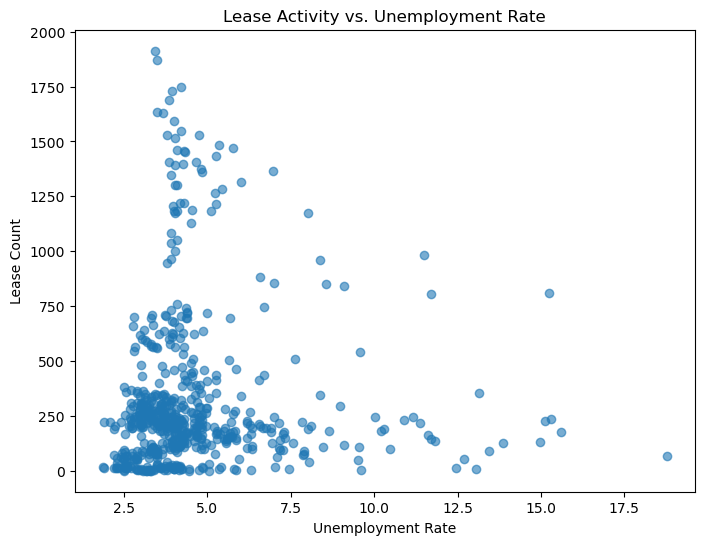

In [23]:
# ----- 5. Analyze the Relationship -----
# Calculate the correlation between LeaseCount and unemployment_rate.
corr_value = merged_df['LeaseCount'].corr(merged_df['unemployment_rate'])
print(f"Correlation between LeaseCount and unemployment_rate: {corr_value:.3f}")

# Scatter Plot: Visualize the relationship.
plt.figure(figsize=(8, 6))
plt.scatter(merged_df['unemployment_rate'], merged_df['LeaseCount'], alpha=0.6)
plt.xlabel('Unemployment Rate')
plt.ylabel('Lease Count')
plt.title('Lease Activity vs. Unemployment Rate')
plt.show()

#### Scatter Plot (Lease Activity vs. Unemployment Rate)

- The overall scatter shows no pronounced pattern between unemployment rate and lease counts (correlation ≈ 0.028), indicating essentially no linear relationship.

- Even at higher unemployment levels, there are instances of both high and low lease activity, **suggesting other factors may be more influential in driving lease volumes.**

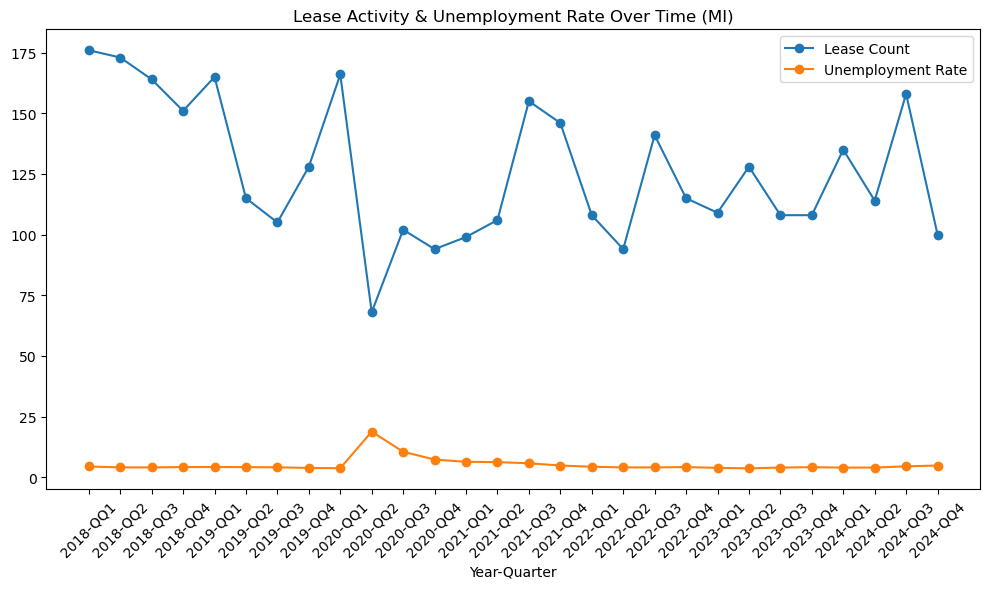

In [24]:
# ----- 6. Time-Series Visualization for a Specific State (Example: California 'CA') -----
# Filter the merged data for a specific state (e.g., 'CA'). Change as needed.
state_data = merged_df[merged_df['state'] == 'MI'].copy()

# Create a string column representing "Year-Quarter" for easier plotting.
state_data['Year_Quarter'] = state_data['year'].astype(str) + "-Q" + state_data['quarter'].astype(str)

plt.figure(figsize=(10, 6))
plt.plot(state_data['Year_Quarter'], state_data['LeaseCount'], marker='o', label='Lease Count')
plt.plot(state_data['Year_Quarter'], state_data['unemployment_rate'], marker='o', label='Unemployment Rate')
plt.xlabel('Year-Quarter')
plt.title('Lease Activity & Unemployment Rate Over Time (MI)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#### Time-Series (MI: 2018Q1–2023Q4)

- Lease Count remains relatively stable over time, with modest ups and downs, while the unemployment rate fluctuates only slightly on the lower end (under 10%).

- The two lines do not appear to move in tandem, **reinforcing the idea that lease activity does not closely track the state’s unemployment changes.**

### Question: Does leasing activity decrease when unemployment rises?

In [25]:
# --- 3. Prepare the Occupancy Data ---
# Select only the needed columns and rename for clarity.
occupancy_grouped = major_occupancy[['year', 'quarter', 'market', 'avg_occupancy_proportion']].copy()
occupancy_grouped.rename(columns={'avg_occupancy_proportion': 'AvgOccupancy'}, inplace=True)

In [26]:
print("Occupancy Data:")
print(occupancy_grouped.head())

Occupancy Data:
   year quarter           market  AvgOccupancy
0  2020      Q1  Washington D.C.      0.785714
1  2020      Q1        Manhattan      0.732857
2  2020      Q1          Chicago      0.788571
3  2020      Q1          Houston      0.835714
4  2020      Q1     Philadelphia      0.817143


In [27]:
# --- 4. Merge the Datasets ---
# Merge on the common keys: year, quarter, and market.
merged_df = pd.merge(
    leases_grouped,
    occupancy_grouped,
    on=['year', 'quarter'],
    how='inner'
)

print("Merged Dataset:")
print(merged_df.head())

Merged Dataset:
   year quarter state  LeaseCount           market  AvgOccupancy
0  2020      Q1    AZ         253  Washington D.C.      0.785714
1  2020      Q1    AZ         253        Manhattan      0.732857
2  2020      Q1    AZ         253          Chicago      0.788571
3  2020      Q1    AZ         253          Houston      0.835714
4  2020      Q1    AZ         253     Philadelphia      0.817143


Correlation between LeaseCount and AvgOccupancy: 0.079


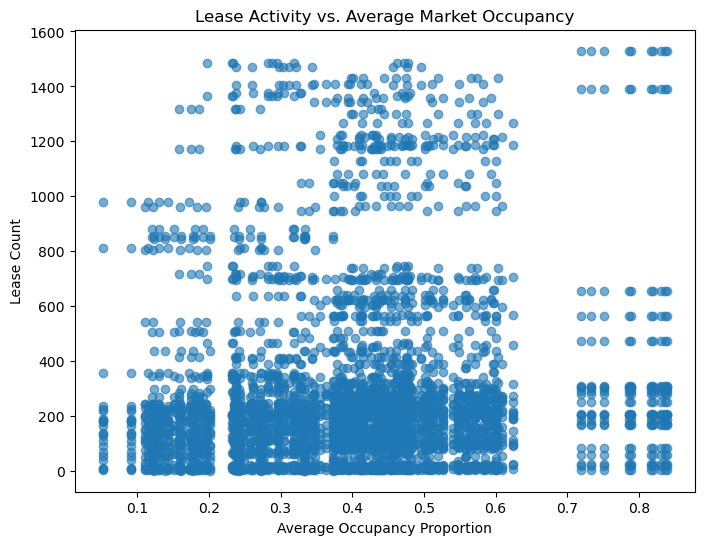

In [28]:
# --- 5. Analyze the Relationship ---
# Compute the Pearson correlation between LeaseCount and AvgOccupancy.
corr_value = merged_df['LeaseCount'].corr(merged_df['AvgOccupancy'])
print(f"Correlation between LeaseCount and AvgOccupancy: {corr_value:.3f}")

# Scatter Plot: Plot LeaseCount vs. AvgOccupancy.
plt.figure(figsize=(8,6))
plt.scatter(merged_df['AvgOccupancy'], merged_df['LeaseCount'], alpha=0.6)
plt.xlabel('Average Occupancy Proportion')
plt.ylabel('Lease Count')
plt.title('Lease Activity vs. Average Market Occupancy')
plt.show()

#### Scatter Plot & Correlation Interpretation (two bullet points)

- Despite a slight positive correlation of 0.079, the broad scatter suggests no strong linear relationship between lease count and average market occupancy proportions.

- The cluster of points across all occupancy ranges indicates that other factors beyond these pandemic-based occupancy measures likely drive lease volumes.

In [29]:
def covid_period(row):
    # Convert 'year' to an integer.
    year = int(row['year'])
    
    # 'quarter' might be in the format 'Q1', 'Q2', etc. Remove the 'Q' and convert to an integer.
    quarter_str = row['quarter']
    quarter = int(quarter_str.replace('Q', '').strip())
    
    # Define periods based on year and quarter.
    if (year < 2020) or (year == 2020 and quarter < 2):
        return 'Pre-COVID'
    elif (year == 2020 and quarter >= 2) or (year < 2022):
        return 'During COVID'
    else:
        return 'Post-COVID'

# Apply the updated function to create the new CovidPeriod column.
merged_df['CovidPeriod'] = merged_df.apply(covid_period, axis=1)
print(merged_df[['year', 'quarter', 'CovidPeriod']].head())


   year quarter CovidPeriod
0  2020      Q1   Pre-COVID
1  2020      Q1   Pre-COVID
2  2020      Q1   Pre-COVID
3  2020      Q1   Pre-COVID
4  2020      Q1   Pre-COVID


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# 1. GROUP & SUMMARIZE
# -------------------------------
# Aggregate summary statistics by CovidPeriod for LeaseCount and AvgOccupancy.
group_summary = merged_df.groupby('CovidPeriod').agg(
    LeaseCount_Mean=('LeaseCount', 'mean'),
    LeaseCount_Median=('LeaseCount', 'median'),
    LeaseCount_Std=('LeaseCount', 'std'),
    AvgOccupancy_Mean=('AvgOccupancy', 'mean'),
    AvgOccupancy_Median=('AvgOccupancy', 'median'),
    AvgOccupancy_Std=('AvgOccupancy', 'std')
).reset_index()

print("Summary statistics by CovidPeriod:")
group_summary

Summary statistics by CovidPeriod:


,CovidPeriod,LeaseCount_Mean,LeaseCount_Median,LeaseCount_Std,AvgOccupancy_Mean,AvgOccupancy_Median,AvgOccupancy_Std
0,During COVID,268.610390,183.0,307.797207,0.258918,0.246538,0.104993
1,Post-COVID,306.483471,209.0,328.141146,0.456565,0.446538,0.084687
2,Pre-COVID,349.318182,230.5,388.362490,0.792000,0.802857,0.042093


- Lease Activity Trends: Pre-COVID shows the highest mean lease count (349.32), which drops during COVID (268.61) and partially recovers post-COVID (306.48), indicating an overall decline in leasing activity during and after the pandemic.

- Occupancy Trends: Average occupancy is highest Pre-COVID (≈0.79), plunges during COVID (≈0.26), and then improves post-COVID (≈0.46), showing a significant reduction in occupancy levels during the pandemic with only a partial rebound afterward.

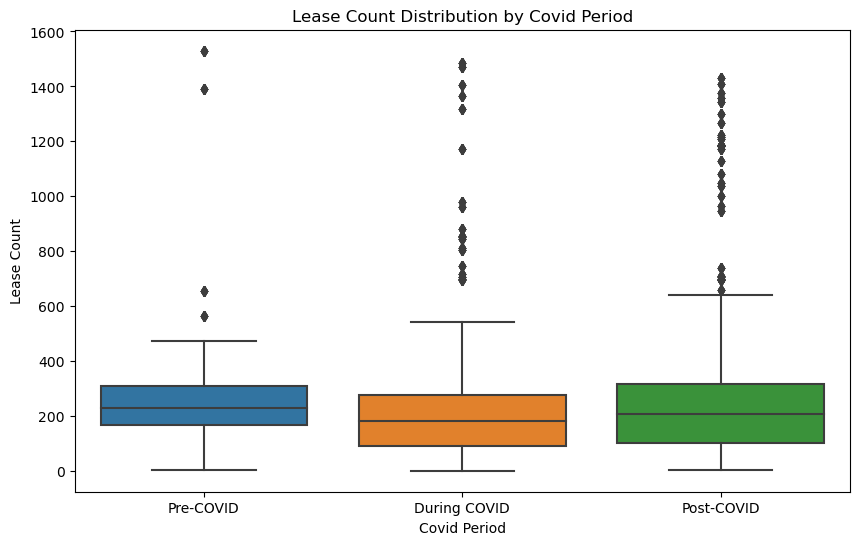

In [31]:
# -------------------------------
# 2. VISUALIZE TRENDS
# -------------------------------
# Boxplot: LeaseCount by CovidPeriod
plt.figure(figsize=(10, 6))
sns.boxplot(x='CovidPeriod', y='LeaseCount', data=merged_df)
plt.title('Lease Count Distribution by Covid Period')
plt.xlabel('Covid Period')
plt.ylabel('Lease Count')
plt.show()

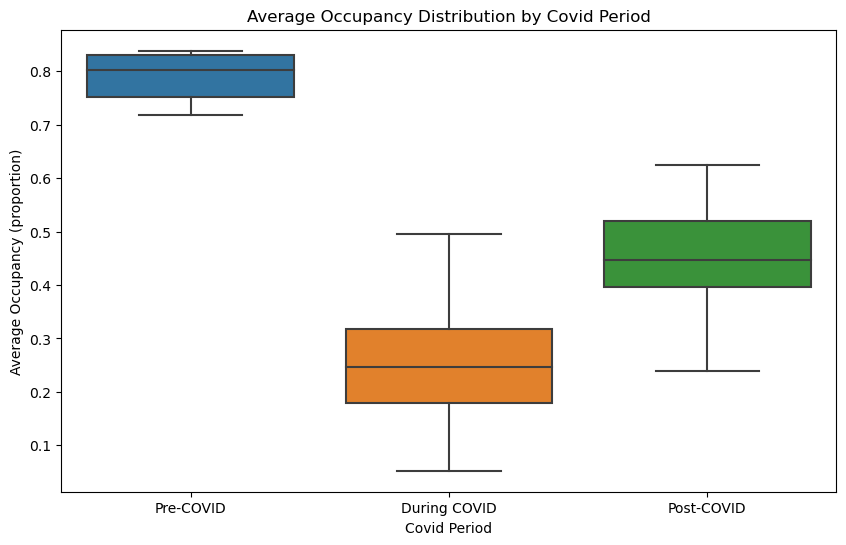

In [32]:
# Boxplot: AvgOccupancy by CovidPeriod
plt.figure(figsize=(10, 6))
sns.boxplot(x='CovidPeriod', y='AvgOccupancy', data=merged_df)
plt.title('Average Occupancy Distribution by Covid Period')
plt.xlabel('Covid Period')
plt.ylabel('Average Occupancy (proportion)')
plt.show()

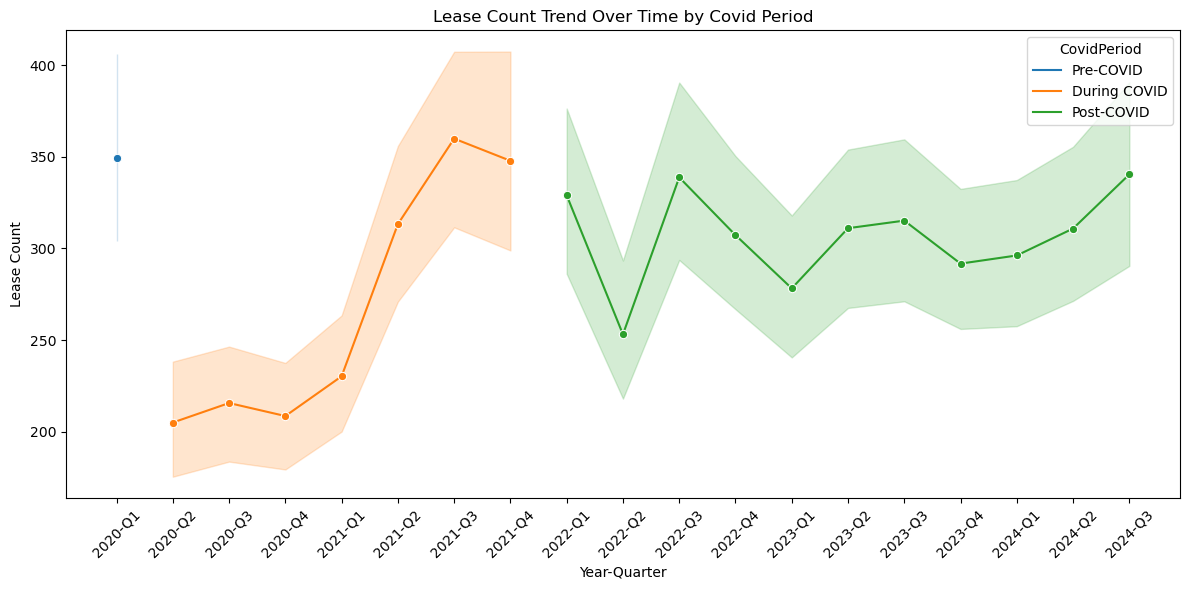

In [33]:
# Time-Series Trends: Create a combined Year-Quarter label.
# Strip the 'Q' from quarter values (e.g., 'Q1' -> '1') if needed.
merged_df['Year_Quarter'] = merged_df['year'].astype(str) + '-Q' + merged_df['quarter'].str.replace('Q', '')

# Sort by Year_Quarter for a proper time sequence.
merged_df = merged_df.sort_values('Year_Quarter')

# Line plot: LeaseCount over time by CovidPeriod.
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year_Quarter', y='LeaseCount', hue='CovidPeriod', marker='o', data=merged_df)
plt.title('Lease Count Trend Over Time by Covid Period')
plt.xlabel('Year-Quarter')
plt.ylabel('Lease Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

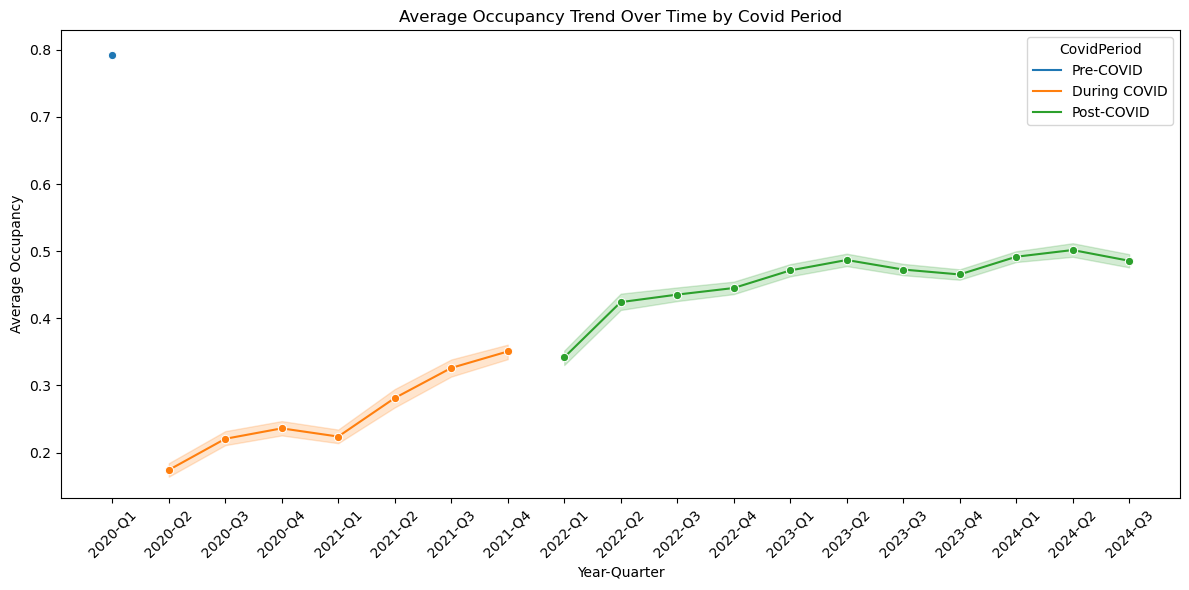

In [34]:
# Line plot: AvgOccupancy over time by CovidPeriod.
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year_Quarter', y='AvgOccupancy', hue='CovidPeriod', marker='o', data=merged_df)
plt.title('Average Occupancy Trend Over Time by Covid Period')
plt.xlabel('Year-Quarter')
plt.ylabel('Average Occupancy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [35]:
# -------------------------------
# 3. WITHIN-PERIOD CORRELATION
# -------------------------------
# Compute Pearson correlation between LeaseCount and AvgOccupancy within each CovidPeriod.
correlations = merged_df.groupby('CovidPeriod').apply(
    lambda df: df['LeaseCount'].corr(df['AvgOccupancy'])
).reset_index(name='Correlation')

print("Within-Period correlations between LeaseCount and AvgOccupancy:")
print(correlations)

Within-Period correlations between LeaseCount and AvgOccupancy:
    CovidPeriod   Correlation
0  During COVID  1.085202e-01
1    Post-COVID -3.242825e-03
2     Pre-COVID  2.818750e-18


**Leasing Activity Trends:**

The graphs indicate that leasing activity was strongest in the Pre-COVID period, experienced a notable decline during COVID, and then partially rebounded post-COVID, with increased variability during the disruption suggesting uneven market responses.

**Occupancy Trends:**

Occupancy levels were highest before the pandemic, plummeted during COVID (reflecting significant under-occupancy relative to the March 1, 2020 baseline), and only partially recovered post-COVID, indicating that full market normalization in occupancy has yet to be achieved.

## Data Cleaning Before More EDA

**Data Cleaning & EDA Refinement:**

Validate and clean the data by checking for missing values, duplicates, and outliers, ensuring that time-related fields (year, quarter) and numerical fields (LeaseCount, AvgOccupancy) are in proper formats before proceeding further.

Enhance the EDA by diving deeper into sub-segments (e.g., by market or region) to assess consistency and uncover hidden patterns that might be affected by data quality issues.

**Modeling & Advanced Analysis Directions:**

Consider building regression models (linear or time-series models) to quantify the relationship between occupancy and leasing activity, incorporating COVID-period indicators and potential interaction effects (e.g., how the impact of occupancy on leasing might differ by period).

Explore lagged effects and causal inference methods (e.g., difference-in-differences) to better understand the temporal dynamics and post-pandemic recovery trajectories, which could provide predictive insights for future market behavior.

In [36]:
# Assuming your merged dataframe is called merged_df
# Let's start by looking at a summary of missing values and duplicates

# 1. Check for missing values and duplicates
print("Missing values per column:")
print(merged_df.isnull().sum())

Missing values per column:
year            0
quarter         0
state           0
LeaseCount      0
market          0
AvgOccupancy    0
CovidPeriod     0
Year_Quarter    0
dtype: int64


In [37]:
print("\nNumber of duplicate rows:", merged_df.duplicated().sum())


Number of duplicate rows: 0


In [38]:
# 2. Ensure 'year' and 'quarter' fields are in proper formats.
# Convert 'year' to int.
merged_df['year'] = merged_df['year'].astype(int)

# 'quarter' might be in the form 'Q1', 'Q2', etc.
# Remove the 'Q' and convert to integer if needed
merged_df['quarter'] = merged_df['quarter'].str.replace('Q', '').astype(int)

In [39]:
# 3. Check numerical fields for proper formats with summary statistics
print("\nSummary statistics for LeaseCount and AvgOccupancy:")
print(merged_df[['LeaseCount', 'AvgOccupancy']].describe())



Summary statistics for LeaseCount and AvgOccupancy:
        LeaseCount  AvgOccupancy
count  4180.000000   4180.000000
mean    294.784689      0.401402
std     324.977039      0.159935
min       1.000000      0.052308
25%      99.000000      0.283077
50%     203.000000      0.410385
75%     306.000000      0.490000
max    1530.000000      0.838571


In [40]:
merged_df

,year,quarter,state,LeaseCount,market,AvgOccupancy,CovidPeriod,Year_Quarter
0,2020,1,AZ,253,Washington D.C.,0.785714,Pre-COVID,2020-Q1
140,2020,1,NY,654,Washington D.C.,0.785714,Pre-COVID,2020-Q1
141,2020,1,NY,654,Manhattan,0.732857,Pre-COVID,2020-Q1
142,2020,1,NY,654,Chicago,0.788571,Pre-COVID,2020-Q1
143,2020,1,NY,654,Houston,0.835714,Pre-COVID,2020-Q1
...,...,...,...,...,...,...,...,...
4036,2024,3,IL,415,Los Angeles,0.461538,Post-COVID,2024-Q3
4037,2024,3,IL,415,Dallas/Ft Worth,0.574615,Post-COVID,2024-Q3
4038,2024,3,IL,415,South Bay/San Jose,0.398462,Post-COVID,2024-Q3
4027,2024,3,GA,276,Dallas/Ft Worth,0.574615,Post-COVID,2024-Q3


In [41]:
# 4. Outlier detection using the IQR method for LeaseCount and AvgOccupancy
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

lease_outliers = detect_outliers(merged_df, 'LeaseCount')
occupancy_outliers = detect_outliers(merged_df, 'AvgOccupancy')

print("\nOutliers detected in LeaseCount:")
print(lease_outliers[['year', 'quarter', 'market', 'LeaseCount']])
print("\nOutliers detected in AvgOccupancy:")
print(occupancy_outliers[['year', 'quarter', 'market', 'AvgOccupancy']])


Outliers detected in LeaseCount:
      year  quarter              market  LeaseCount
140   2020        1     Washington D.C.         654
141   2020        1           Manhattan         654
142   2020        1             Chicago         654
143   2020        1             Houston         654
144   2020        1        Philadelphia         654
...    ...      ...                 ...         ...
4015  2024        3       San Francisco         695
4016  2024        3         Los Angeles         695
4017  2024        3     Dallas/Ft Worth         695
4018  2024        3  South Bay/San Jose         695
4019  2024        3              Austin         695

[570 rows x 4 columns]

Outliers detected in AvgOccupancy:
     year  quarter           market  AvgOccupancy
143  2020        1          Houston      0.835714
144  2020        1     Philadelphia      0.817143
146  2020        1      Los Angeles      0.831429
147  2020        1  Dallas/Ft Worth      0.838571
149  2020        1           Aus

In [42]:
# Summary statistics by market
market_summary = merged_df.groupby('market').agg(
    LeaseCount_Mean=('LeaseCount', 'mean'),
    LeaseCount_Median=('LeaseCount', 'median'),
    LeaseCount_Std=('LeaseCount', 'std'),
    AvgOccupancy_Mean=('AvgOccupancy', 'mean'),
    AvgOccupancy_Median=('AvgOccupancy', 'median'),
    AvgOccupancy_Std=('AvgOccupancy', 'std')
).reset_index()

market_summary

,market,LeaseCount_Mean,LeaseCount_Median,LeaseCount_Std,AvgOccupancy_Mean,AvgOccupancy_Median,AvgOccupancy_Std
0,Austin,294.784689,203.0,325.327544,0.517043,0.562308,0.136852
1,Chicago,294.784689,203.0,325.327544,0.388947,0.412105,0.166416
2,Dallas/Ft Worth,294.784689,203.0,325.327544,0.485768,0.501667,0.116318
3,Houston,294.784689,203.0,325.327544,0.503773,0.547143,0.133493
4,Los Angeles,294.784689,203.0,325.327544,0.398406,0.420000,0.134288
5,Manhattan,294.784689,203.0,325.327544,0.349343,0.394737,0.170053
6,Philadelphia,294.784689,203.0,325.327544,0.365611,0.376316,0.128852
7,San Francisco,294.784689,203.0,325.327544,0.317613,0.363684,0.155930
8,South Bay/San Jose,294.784689,203.0,325.327544,0.318399,0.346842,0.139774
9,Washington D.C.,294.784689,203.0,325.327544,0.369118,0.396842,0.144804


### aggregating leases by market for closer inspection

In [43]:
# ----- 1. Aggregate Leases by Market -----
# Re-aggregate the leases data to capture market-specific lease counts.
# (Assuming the 'leases' DataFrame is already loaded.)
leases_market = leases.groupby(['year', 'quarter', 'market']).size().reset_index(name='LeaseCount')

# ----- 2. If not already merged, merge with occupancy data aggregated by year, quarter, and market.
# Here, we assume occupancy is from the occupancy dataset and already contains the 'AvgOccupancy' column.
# (If you already have a merged_df, skip this merge if it already contains the proper aggregation keys.)
occupancy_subset = major_occupancy[['year', 'quarter', 'market', 'avg_occupancy_proportion']].copy()
occupancy_subset.rename(columns={'avg_occupancy_proportion': 'AvgOccupancy'}, inplace=True)

merged_market = pd.merge(
    leases_market,
    occupancy_subset,
    on=['year', 'quarter', 'market'],
    how='inner'
)

In [44]:
# ----- 3. Create Market-Level Summary Statistics -----
# Here, we want to calculate overall market-specific statistics.
# Since merged_market has one row per market per year & quarter, we first summarize within each period 
# and then aggregate across time for each market.
market_summary = merged_market.groupby(['year','quarter','market']).agg(
    TotalLeaseCount=('LeaseCount', 'sum'),
    AvgOccupancy=('AvgOccupancy', 'mean')
).reset_index()

# Now group by market to get overall summary statistics across periods.
market_summary_final = market_summary.groupby('market').agg(
    LeaseCount_Mean=('TotalLeaseCount', 'mean'),
    LeaseCount_Median=('TotalLeaseCount', 'median'),
    LeaseCount_Std=('TotalLeaseCount', 'std'),
    AvgOccupancy_Mean=('AvgOccupancy', 'mean'),
    AvgOccupancy_Median=('AvgOccupancy', 'median'),
    AvgOccupancy_Std=('AvgOccupancy', 'std')
).reset_index()

market_summary_final

,market,LeaseCount_Mean,LeaseCount_Median,LeaseCount_Std,AvgOccupancy_Mean,AvgOccupancy_Median,AvgOccupancy_Std
0,Austin,165.263158,167.0,39.949749,0.517043,0.562308,0.140434
1,Chicago,163.210526,162.0,43.578255,0.388947,0.412105,0.170772
2,Dallas/Ft Worth,487.421053,480.0,86.097694,0.485768,0.501667,0.119362
3,Houston,492.947368,501.0,92.530159,0.503773,0.547143,0.136987
4,Los Angeles,518.526316,537.0,97.443641,0.398406,0.420000,0.137803
5,Manhattan,564.526316,623.0,162.774339,0.349343,0.394737,0.174504
6,Philadelphia,144.789474,141.0,41.761996,0.365611,0.376316,0.132225
7,San Francisco,102.421053,108.0,38.813394,0.317613,0.363684,0.160011
8,South Bay/San Jose,99.631579,93.0,28.318056,0.318399,0.346842,0.143433
9,Washington D.C.,133.736842,137.0,28.786266,0.369118,0.396842,0.148594


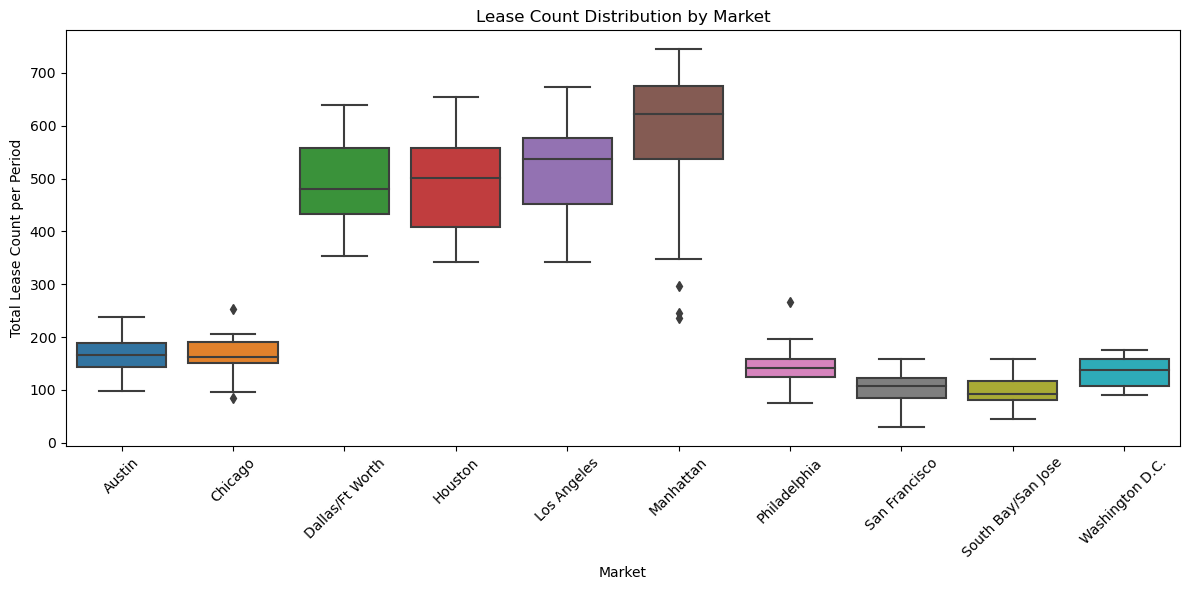

In [45]:
# ----- 4. Optional: Visualize Market-Level Differences -----
plt.figure(figsize=(12,6))
sns.boxplot(x='market', y='TotalLeaseCount', data=market_summary)
plt.title('Lease Count Distribution by Market')
plt.xlabel('Market')
plt.ylabel('Total Lease Count per Period')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

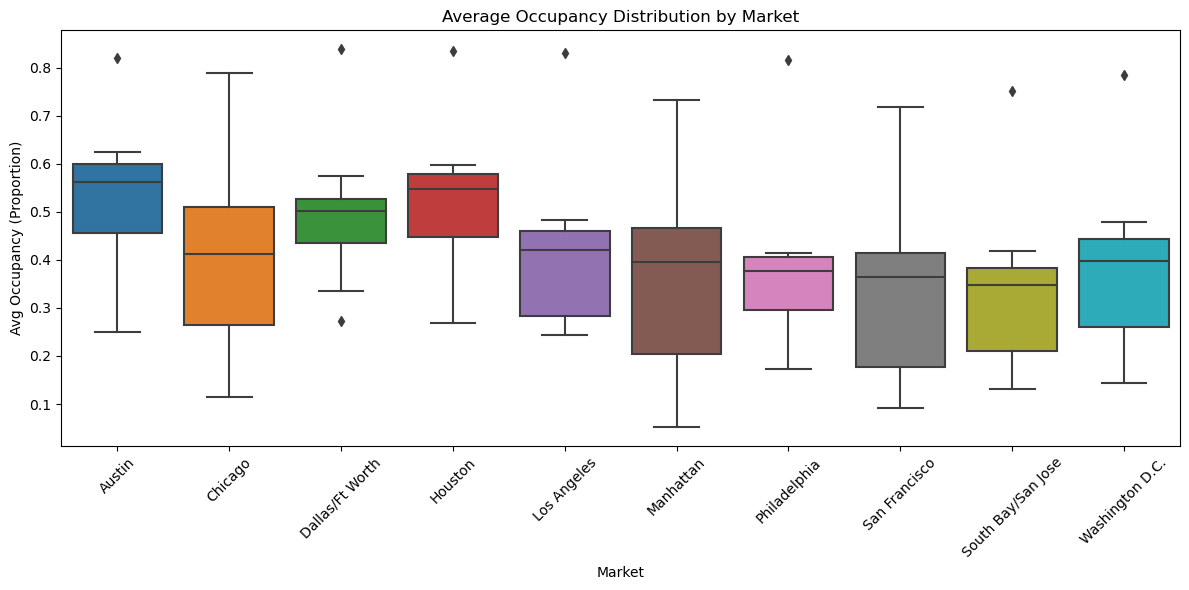

In [46]:
plt.figure(figsize=(12,6))
sns.boxplot(x='market', y='AvgOccupancy', data=market_summary)
plt.title('Average Occupancy Distribution by Market')
plt.xlabel('Market')
plt.ylabel('Avg Occupancy (Proportion)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [47]:
# -------------------------------
# CORRELATION BETWEEN OCCUPANCY & UNEMPLOYMENT (NATIONAL LEVEL)
# -------------------------------
# Aggregate occupancy data by year and quarter (using avg_occupancy_proportion)
major_occupancy_agg = major_occupancy.groupby(['year', 'quarter'])['avg_occupancy_proportion'] \
                         .mean() \
                         .reset_index(name='AvgOccupancy')

# Aggregate unemployment data by year and quarter (national average)
unemployment_agg = unemployment.groupby(['year', 'quarter'])['unemployment_rate'] \
                               .mean() \
                               .reset_index(name='UnemploymentRate')

# Merge the aggregated data on year and quarter
merged_occ_unemp = pd.merge(major_occupancy_agg, unemployment_agg, on=['year','quarter'], how='inner')

# Compute Pearson correlation between AvgOccupancy and UnemploymentRate
corr_occ_unemp = merged_occ_unemp['AvgOccupancy'].corr(merged_occ_unemp['UnemploymentRate'])
print("Correlation between National Avg Occupancy and Unemployment:", corr_occ_unemp)

Correlation between National Avg Occupancy and Unemployment: -0.6955298170971906


In [48]:
# -------------------------------
# CORRELATION BETWEEN LEASE COUNT & UNEMPLOYMENT (BY STATE)
# -------------------------------
# Aggregate lease data by year, quarter, and state
lease_state_agg = leases.groupby(['year', 'quarter', 'state']).size().reset_index(name='LeaseCount')

# Aggregate unemployment data by year, quarter, and state
unemployment_state_agg = unemployment.groupby(['year', 'quarter', 'state'])['unemployment_rate'] \
                                     .mean() \
                                     .reset_index(name='UnemploymentRate')

# Merge lease data and unemployment data on year, quarter, and state
merged_lease_unemp = pd.merge(lease_state_agg, unemployment_state_agg, on=['year', 'quarter', 'state'], how='inner')

# Compute Pearson correlation between LeaseCount and UnemploymentRate across all states and periods
corr_lease_unemp = merged_lease_unemp['LeaseCount'].corr(merged_lease_unemp['UnemploymentRate'])
print("Correlation between LeaseCount (by state) and Unemployment:", corr_lease_unemp)

Correlation between LeaseCount (by state) and Unemployment: 0.02800522964731509


**National Avg Occupancy vs. Unemployment:**

A strong negative correlation (-0.696) indicates that as unemployment increases, the national average occupancy tends to drop significantly relative to the March 1, 2020 baseline.

This suggests higher unemployment is associated with reduced occupancy levels, reflecting lower market utilization or under-occupancy.

**Lease Count (by state) vs. Unemployment:**

A near-zero correlation (0.028) reveals almost no linear relationship between state-level leasing activity and unemployment.

This implies that other factors may be more influential in driving lease counts than unemployment rates alone.

In [49]:
# --- Step 1: Aggregate Major Occupancy Data --- 
# This is our target, measured at market level per quarter
occupancy_df = major_occupancy[['year', 'quarter', 'market', 'avg_occupancy_proportion',
                                'ending_occupancy_proportion', 'starting_occupancy_proportion']].copy()
# Optionally rename the occupancy column for clarity
occupancy_df.rename(columns={'avg_occupancy_proportion': 'AvgOccupancy'}, inplace=True)

# --- Step 2: Aggregate Leases Data ---
# We calculate the number of leases (leasing activity) per market per quarter.
leases_agg = leases.groupby(['year', 'quarter', 'market', 'internal_class']).size().reset_index(name='LeaseCount')
# You might also consider aggregating other variables (e.g., sum of leasedSF) if relevant.

# --- Step 3: Aggregate Price Availability Data ---
# For example, let's take the overall rent as a pricing metric. You could average it per market.
price_df = price_availability.groupby(['year', 'quarter', 'market', 'internal_class']).agg({
    'overall_rent': 'mean', 'RBA': 'mean',  'available_space': 'mean', 'availability_proportion': 'mean', 
    'leasing': 'mean', 
    # You can add other pricing-related metrics here as needed.
}).reset_index()

# --- Step 4: Prepare Unemployment Data ---
# Unemployment is at the state level. First, we aggregate unemployment by state, year and quarter.
unemp_state = unemployment.groupby(['year', 'quarter', 'state'])['unemployment_rate'].mean().reset_index()

In [50]:
# --- Step 5: Create a Market-to-State Mapping from the Leases Data ---
# Since leases contain both market and state, we can assume the most frequent state for a market.
market_state_map = leases.groupby('market')['state'].agg(lambda x: x.value_counts().index[0]).reset_index()
market_state_map.rename(columns={'state': 'MarketState'}, inplace=True)

In [51]:
# --- Step 6: Merge Unemployment Data with the Market Mapping ---
# Merge the aggregated unemployment (by state) with our mapping so that each market gets its corresponding unemployment rate.
# First, merge market_state_map with unemployment data on state.
unemp_market = pd.merge(market_state_map, unemp_state, left_on='MarketState', right_on='state', how='left')
# Drop the redundant 'state' column; rename unemployment_rate for clarity.
unemp_market.drop(columns=['state'], inplace=True)
unemp_market.rename(columns={'unemployment_rate': 'UnemploymentRate'}, inplace=True)
# Now unemp_market contains: market, MarketState, year, quarter, UnemploymentRate.

In [52]:
# --- Step 7: Merge All DataFrames Together ---
# Merge occupancy, leases, price availability, and unemployment (by market) into one regression dataset.
df_merged = pd.merge(occupancy_df, leases_agg, on=['year', 'quarter', 'market'], how='left')
df_merged = pd.merge(df_merged, price_df, on=['year', 'quarter', 'market'], how='left')
df_merged = pd.merge(df_merged, unemp_market[['market', 'year', 'quarter', 'UnemploymentRate']], 
                     on=['market', 'year', 'quarter'], how='left')

# Check the final merged dataset
print(df_merged.head())
print(df_merged.info())

   year quarter           market  AvgOccupancy  ending_occupancy_proportion  \
0  2020      Q1  Washington D.C.      0.785714                         0.19   
1  2020      Q1  Washington D.C.      0.785714                         0.19   
2  2020      Q1        Manhattan      0.732857                         0.08   
3  2020      Q1        Manhattan      0.732857                         0.08   
4  2020      Q1        Manhattan      0.732857                         0.08   

   starting_occupancy_proportion internal_class_x  LeaseCount  \
0                           0.98                A          79   
1                           0.98                O          93   
2                           0.98                A         197   
3                           0.98                A         197   
4                           0.98                O         457   

  internal_class_y  overall_rent          RBA  available_space  \
0              NaN           NaN          NaN              NaN   
1 

In [53]:
# Check missing values in the encoded DataFrame:
missing_values_before_encode = df_merged.isnull().sum()
print(missing_values_before_encode)

year                               0
quarter                            0
market                             0
AvgOccupancy                       0
ending_occupancy_proportion        0
starting_occupancy_proportion      0
internal_class_x                   0
LeaseCount                         0
internal_class_y                 152
overall_rent                     152
RBA                              152
available_space                  152
availability_proportion          152
leasing                          152
UnemploymentRate                   0
dtype: int64


In [54]:
# Create a copy of your dataframe for encoding
df = df_merged.copy()

# Fill missing values in internal_class_y with 'Unknown'
df['internal_class_y'] = df['internal_class_y'].fillna('Unknown')

# Optionally: if 'quarter' is naturally ordinal (Q1 < Q2 < Q3 < Q4), you may consider
# encoding it as ordinal. However, here we perform one-hot encoding for uniformity.
# For one-hot encoding of categorical variables, use pd.get_dummies:
categorical_columns = ['quarter', 'market', 'internal_class_x', 'internal_class_y']

# Get dummy variables for the chosen categorical columns. drop_first is True to avoid multicollinearity.
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Check the updated dataframe columns
print(df_encoded.columns)
print(df_encoded.head())

Index(['year', 'AvgOccupancy', 'ending_occupancy_proportion',
       'starting_occupancy_proportion', 'LeaseCount', 'overall_rent', 'RBA',
       'available_space', 'availability_proportion', 'leasing',
       'UnemploymentRate', 'quarter_Q2', 'quarter_Q3', 'quarter_Q4',
       'market_Chicago', 'market_Dallas/Ft Worth', 'market_Houston',
       'market_Los Angeles', 'market_Manhattan', 'market_Philadelphia',
       'market_San Francisco', 'market_South Bay/San Jose',
       'market_Washington D.C.', 'internal_class_x_O', 'internal_class_y_O',
       'internal_class_y_Unknown'],
      dtype='object')
   year  AvgOccupancy  ending_occupancy_proportion  \
0  2020      0.785714                         0.19   
1  2020      0.785714                         0.19   
2  2020      0.732857                         0.08   
3  2020      0.732857                         0.08   
4  2020      0.732857                         0.08   

   starting_occupancy_proportion  LeaseCount  overall_rent         

In [55]:
# Check missing values in the encoded DataFrame:
missing_values = df_encoded.isnull().sum()
print(missing_values)

year                               0
AvgOccupancy                       0
ending_occupancy_proportion        0
starting_occupancy_proportion      0
LeaseCount                         0
overall_rent                     152
RBA                              152
available_space                  152
availability_proportion          152
leasing                          152
UnemploymentRate                   0
quarter_Q2                         0
quarter_Q3                         0
quarter_Q4                         0
market_Chicago                     0
market_Dallas/Ft Worth             0
market_Houston                     0
market_Los Angeles                 0
market_Manhattan                   0
market_Philadelphia                0
market_San Francisco               0
market_South Bay/San Jose          0
market_Washington D.C.             0
internal_class_x_O                 0
internal_class_y_O                 0
internal_class_y_Unknown           0
dtype: int64


In [56]:
df_encoded

,year,AvgOccupancy,ending_occupancy_proportion,starting_occupancy_proportion,LeaseCount,overall_rent,RBA,available_space,availability_proportion,leasing,...,market_Houston,market_Los Angeles,market_Manhattan,market_Philadelphia,market_San Francisco,market_South Bay/San Jose,market_Washington D.C.,internal_class_x_O,internal_class_y_O,internal_class_y_Unknown
0,2020,0.785714,0.19,0.98,79,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,1
1,2020,0.785714,0.19,0.98,93,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1,1,0,1
2,2020,0.732857,0.08,0.98,197,83.884755,255216822.0,31291531.0,0.122608,4652325.0,...,0,0,1,0,0,0,0,0,0,0
3,2020,0.732857,0.08,0.98,197,83.884755,199480433.0,20667928.0,0.103609,3244920.0,...,0,0,1,0,0,0,0,0,1,0
4,2020,0.732857,0.08,0.98,457,83.884755,255216822.0,31291531.0,0.122608,4652325.0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,2024,0.398462,0.42,0.34,123,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,1,0,1
604,2024,0.603846,0.64,0.58,78,46.524177,46533411.0,16009071.0,0.344034,997318.0,...,0,0,0,0,0,0,0,0,0,0
605,2024,0.603846,0.64,0.58,78,46.524177,28787151.0,6049318.0,0.210140,286801.0,...,0,0,0,0,0,0,0,0,1,0
606,2024,0.603846,0.64,0.58,99,46.524177,46533411.0,16009071.0,0.344034,997318.0,...,0,0,0,0,0,0,0,1,0,0


In [57]:
# -------------------------------
# 1. Filter datasets to year >= 2020
# -------------------------------
occ_df   = major_occupancy[major_occupancy['year'] >= 2020].copy()
leases_df = leases[leases['year'] >= 2020].copy()
unemp_df  = unemployment[unemployment['year'] >= 2020].copy()
price_df  = price_availability[price_availability['year'] >= 2020].copy()

# -------------------------------
# 2. Aggregate Major Occupancy Data (Target)
# -------------------------------
occupancy_df = occ_df[['year', 'quarter', 'market', 
                       'avg_occupancy_proportion',
                       'ending_occupancy_proportion',
                       'starting_occupancy_proportion']].copy()
# Rename for clarity
occupancy_df.rename(columns={'avg_occupancy_proportion': 'AvgOccupancy'}, inplace=True)

# -------------------------------
# 3. Aggregate Leases Data (Leasing Activity)
# -------------------------------
# Count the number of leases per year, quarter, market, and internal_class.
leases_agg = leases_df.groupby(['year', 'quarter', 'market', 'internal_class']).size().reset_index(name='LeaseCount')

# -------------------------------
# 4. Aggregate Price Availability Data (Pricing Metrics)
# -------------------------------
# Average key pricing and space variables per year, quarter, market, and internal_class.
price_df_agg = price_df.groupby(['year', 'quarter', 'market', 'internal_class']).agg({
    'overall_rent': 'mean',
    'RBA': 'mean',
    'available_space': 'mean',
    'availability_proportion': 'mean',
    'leasing': 'mean'
}).reset_index()

# -------------------------------
# 5. Prepare Unemployment Data (Economic Conditions)
# -------------------------------
# Aggregate unemployment by state, year, and quarter.
unemp_state = unemp_df.groupby(['year', 'quarter', 'state'])['unemployment_rate'].mean().reset_index()

# Create a market-to-state mapping using the leases data (selecting the most common state per market).
market_state_map = leases_df.groupby('market')['state'].agg(lambda x: x.value_counts().index[0]).reset_index()
market_state_map.rename(columns={'state': 'MarketState'}, inplace=True)

# Merge unemployment data with the market mapping to assign each market an unemployment rate.
unemp_market = pd.merge(market_state_map, unemp_state, left_on='MarketState', right_on='state', how='left')
# Drop redundant 'state' and rename unemployment_rate for clarity.
unemp_market.drop(columns=['state'], inplace=True)
unemp_market.rename(columns={'unemployment_rate': 'UnemploymentRate'}, inplace=True)

# -------------------------------
# 6. Merge All DataFrames Together for Regression
# -------------------------------
# a) Merge occupancy and leases (both aggregated at year, quarter, market)
df_reg = pd.merge(occupancy_df, leases_agg, on=['year', 'quarter', 'market'], how='left')

# b) Merge with price availability data.
df_reg = pd.merge(df_reg, price_df_agg, on=['year', 'quarter', 'market', 'internal_class'], how='left')

# c) Merge with unemployment data (via the market mapping)
#    Use only the relevant columns from unemp_market.
df_reg = pd.merge(df_reg,
                  unemp_market[['market', 'year', 'quarter', 'UnemploymentRate']],
                  on=['market', 'year', 'quarter'],
                  how='left')

# Check the final merged dataframe
print(df_reg.head())
print(df_reg.info())

   year quarter           market  AvgOccupancy  ending_occupancy_proportion  \
0  2020      Q1  Washington D.C.      0.785714                         0.19   
1  2020      Q1  Washington D.C.      0.785714                         0.19   
2  2020      Q1        Manhattan      0.732857                         0.08   
3  2020      Q1        Manhattan      0.732857                         0.08   
4  2020      Q1          Chicago      0.788571                         0.14   

   starting_occupancy_proportion internal_class  LeaseCount  overall_rent  \
0                           0.98              A          79           NaN   
1                           0.98              O          93           NaN   
2                           0.98              A         197     83.884755   
3                           0.98              O         457     83.884755   
4                           0.99              A          81           NaN   

           RBA  available_space  availability_proportion    le

In [58]:
missing_values = df_reg.isnull().sum()
print(missing_values)


year                               0
quarter                            0
market                             0
AvgOccupancy                       0
ending_occupancy_proportion        0
starting_occupancy_proportion      0
internal_class                     0
LeaseCount                         0
overall_rent                     152
RBA                              152
available_space                  152
availability_proportion          152
leasing                          152
UnemploymentRate                   0
dtype: int64


In [59]:
# Define the desired output filename
output_filename = 'my_output_data.csv'

# Export the DataFrame to CSV
df.to_csv(output_filename)

print(f"\nDataFrame successfully exported to {output_filename}")


DataFrame successfully exported to my_output_data.csv


In [60]:
# Quick comparisons to see if the values are the same or differ
same = (df['internal_class_x'] == df['internal_class_y'])
print(f"Number of identical rows: {same.sum()} out of {len(df)}")
print(df[['internal_class_x','internal_class_y']].head(10))


Number of identical rows: 228 out of 608
  internal_class_x internal_class_y
0                A          Unknown
1                O          Unknown
2                A                A
3                A                O
4                O                A
5                O                O
6                A          Unknown
7                O          Unknown
8                A                A
9                A                O


In [61]:
print(df_reg.columns)

Index(['year', 'quarter', 'market', 'AvgOccupancy',
       'ending_occupancy_proportion', 'starting_occupancy_proportion',
       'internal_class', 'LeaseCount', 'overall_rent', 'RBA',
       'available_space', 'availability_proportion', 'leasing',
       'UnemploymentRate'],
      dtype='object')


In [62]:
import pandas as pd

# List of pricing columns that need imputation
pricing_cols = ['overall_rent', 'RBA', 'available_space', 'availability_proportion', 'leasing']

# Use 'internal_class' as the grouping column (since that's what your df uses)
group_col = 'internal_class'

# Group-level imputation: fill missing values in pricing columns with the median for each (market, internal_class) group.
df_reg[pricing_cols] = df_reg.groupby(['market', group_col])[pricing_cols] \
                             .transform(lambda x: x.fillna(x.median()))

# Check missing values after group-level imputation
print("Missing values after group-level imputation:")
print(df_reg[pricing_cols].isnull().sum())

# For any remaining missing values, fill with the overall median for that column.
for col in pricing_cols:
    if df_reg[col].isnull().sum() > 0:
        overall_median = df_reg[col].median()
        df_reg[col].fillna(overall_median, inplace=True)

# Verify final missing value counts
print("Final missing values after overall imputation:")
print(df_reg[pricing_cols].isnull().sum())


Missing values after group-level imputation:
overall_rent               152
RBA                        152
available_space            152
availability_proportion    152
leasing                    152
dtype: int64
Final missing values after overall imputation:
overall_rent               0
RBA                        0
available_space            0
availability_proportion    0
leasing                    0
dtype: int64


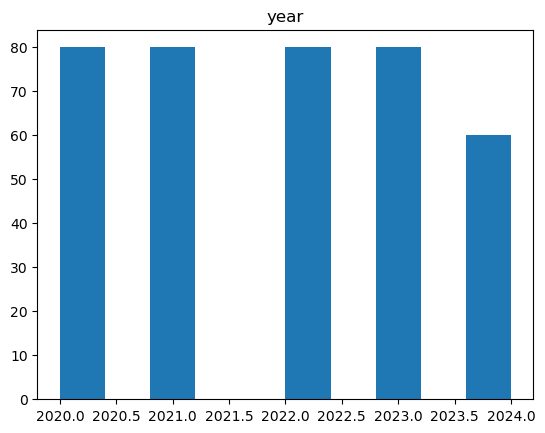

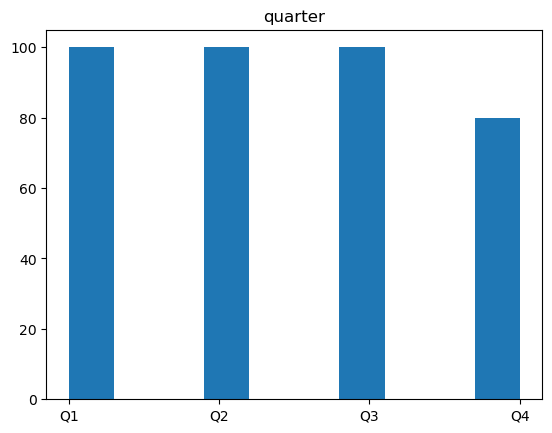

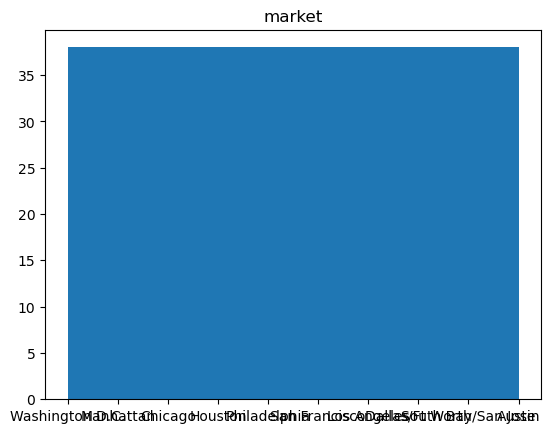

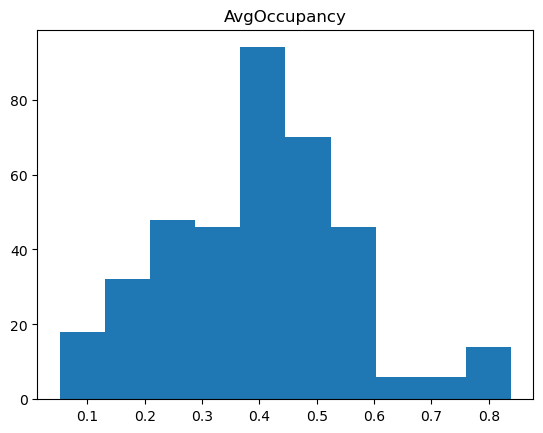

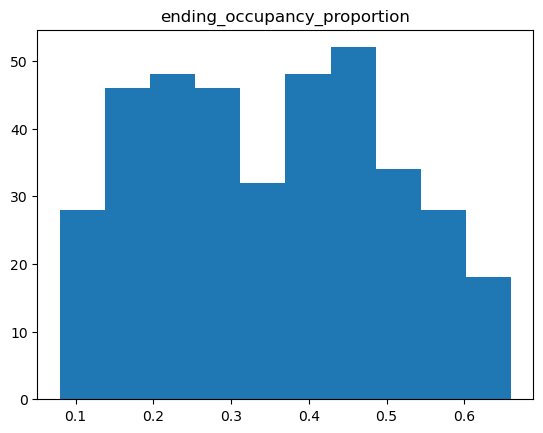

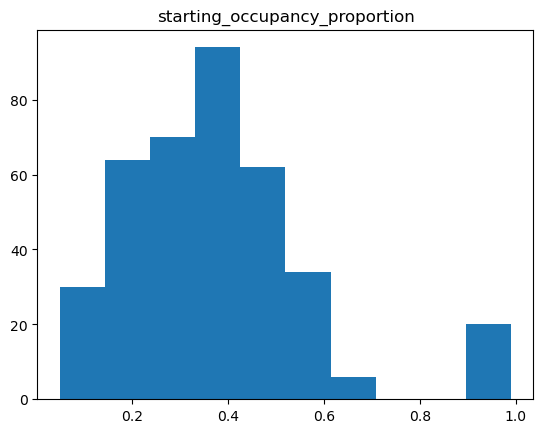

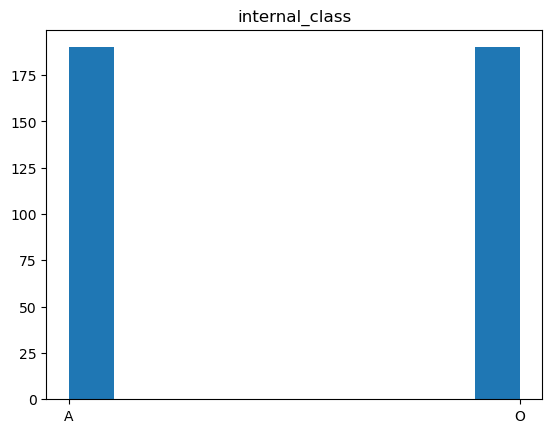

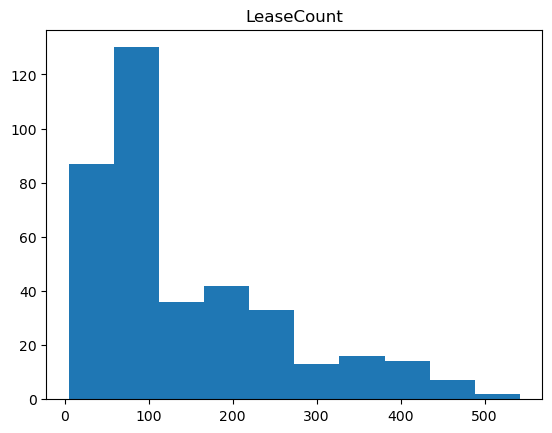

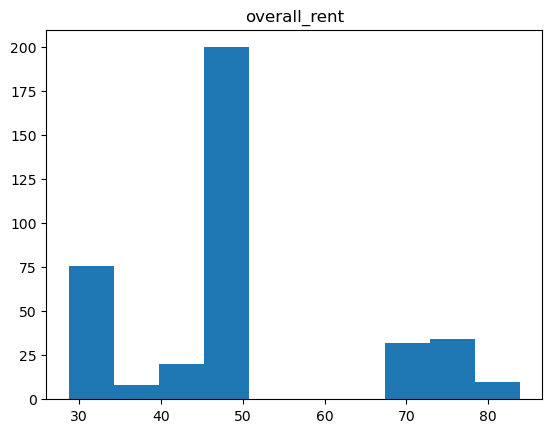

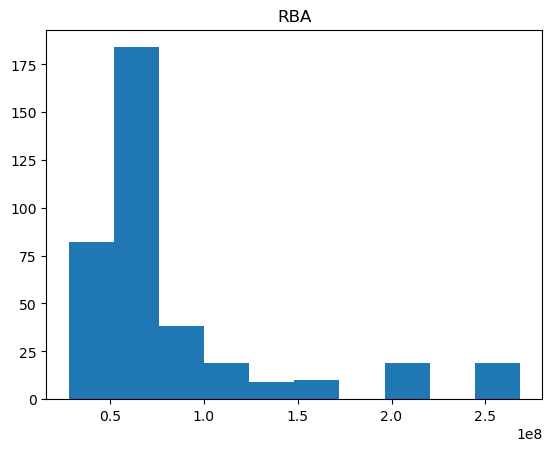

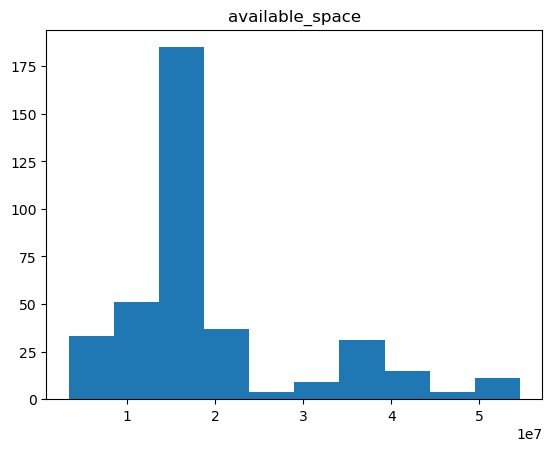

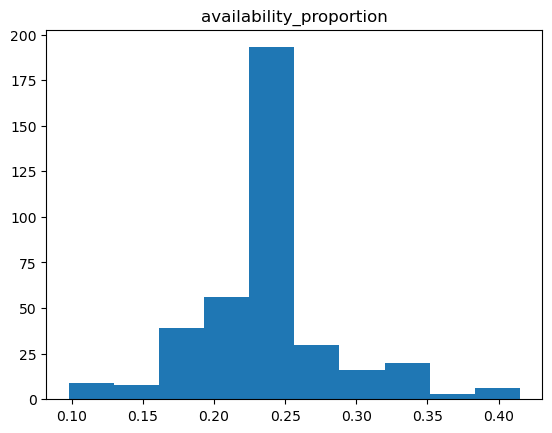

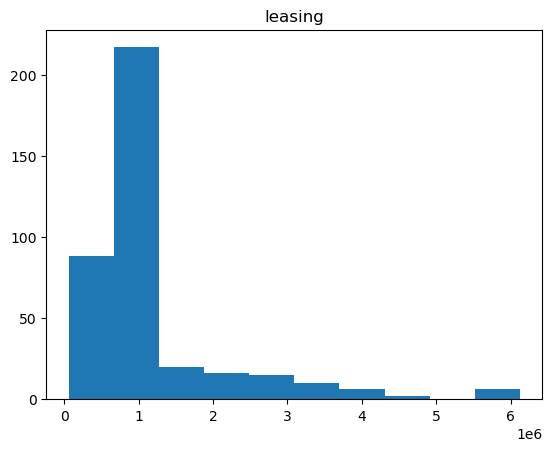

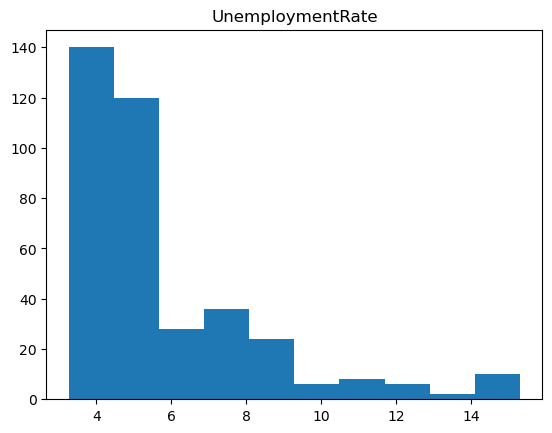

In [63]:
for col in df_reg.columns:
    plt.hist(df_reg[col])
    plt.title(col)
    plt.show()

In [64]:
# --- 1. Drop Unnecessary Columns ---
# Remove ending_occupancy_proportion and starting_occupancy_proportion from df_reg.
df_reg = df_reg.drop(columns=['ending_occupancy_proportion', 'starting_occupancy_proportion'])

# --- 2. Create the Target Binary Variable ---
# Set HighOccupancy = 1 if AvgOccupancy >= 0.5, else 0.
df_reg['HighOccupancy'] = (df_reg['AvgOccupancy'] >= 0.5).astype(int)

# Check the distribution of the target variable.
print("Distribution of HighOccupancy:")
print(df_reg['HighOccupancy'].value_counts())

# --- 3. Encode Categorical Variables ---
# We will encode 'quarter' and 'market'. Typically, year is left numeric.
# For quarter, if it is ordinal you could convert it (Q1 -> 1, Q2 -> 2, etc.), or create dummies.
# Here we create dummies for both quarter and market using one-hot encoding.
df_reg_encoded = pd.get_dummies(df_reg, columns=['quarter', 'market', 'internal_class'], drop_first=True)

# Verify the resulting columns.
print("Columns after encoding:")
print(df_reg_encoded.columns)

Distribution of HighOccupancy:
0    288
1     92
Name: HighOccupancy, dtype: int64
Columns after encoding:
Index(['year', 'AvgOccupancy', 'LeaseCount', 'overall_rent', 'RBA',
       'available_space', 'availability_proportion', 'leasing',
       'UnemploymentRate', 'HighOccupancy', 'quarter_Q2', 'quarter_Q3',
       'quarter_Q4', 'market_Chicago', 'market_Dallas/Ft Worth',
       'market_Houston', 'market_Los Angeles', 'market_Manhattan',
       'market_Philadelphia', 'market_San Francisco',
       'market_South Bay/San Jose', 'market_Washington D.C.',
       'internal_class_O'],
      dtype='object')


Variance Inflation Factors:
                   feature        VIF
0               LeaseCount   3.308764
1             overall_rent   5.564514
2                      RBA  53.249481
3          available_space  71.701125
4  availability_proportion  15.517222
5                  leasing  12.788760
6         UnemploymentRate   1.945871
Target Class Distribution:
0    288
1     92
Name: HighOccupancy, dtype: int64


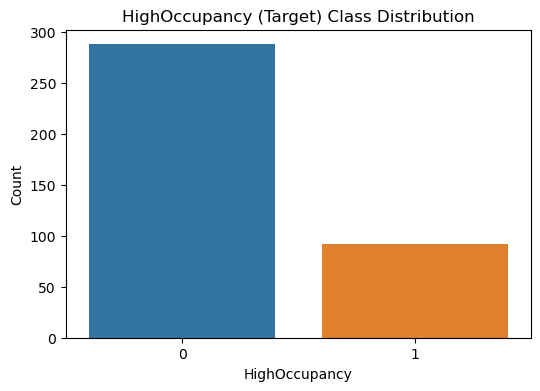

In [65]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

# --- 0. Setup: Assume df_reg_encoded already contains:
# - A binary target variable: HighOccupancy (1 for high occupancy, 0 for low)
# - Encoded categorical variables: quarter, market, internal_class, etc.
# - Numerical predictors: Year (optional), LeaseCount, overall_rent, RBA, available_space, availability_proportion, leasing, UnemploymentRate, AvgOccupancy.
# (Note: You might wish to remove the target variable (AvgOccupancy) from predictors once you create the binary target.)

# Separate features and target.
# Let's drop columns that won't be used as predictors.
# Here, we remove 'AvgOccupancy' (continuous target), and any columns you don't plan on using.
predictor_cols = [col for col in df_reg_encoded.columns if col not in ['HighOccupancy', 'AvgOccupancy']]
X = df_reg_encoded[predictor_cols].copy()
y = df_reg_encoded['HighOccupancy']

# --- 1. Numerical Scaling ---
# Identify numerical columns (example: you may want to scale these numeric predictors)
num_cols = ['LeaseCount', 'overall_rent', 'RBA', 'available_space', 
            'availability_proportion', 'leasing', 'UnemploymentRate']
# Optionally, if you want to scale year, include it; if not, leave it out.
# Note: Encoded dummy variables should remain 0/1.
scaler = MinMaxScaler()
X_scaled = X.copy()
X_scaled[num_cols] = scaler.fit_transform(X[num_cols])

# --- 2. Multicollinearity Check (VIF Calculation) ---
# For VIF, we need a DataFrame with only numeric predictors.
# We combine the scaled numerical features with the dummy variables (assumed numeric) from X_scaled.
# For demonstration, we'll calculate VIF on the subset of predictors that are numeric.
# (Depending on your model, you might calculate VIF for all predictors.)
vif_data = pd.DataFrame()
vif_data["feature"] = X_scaled[num_cols].columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled[num_cols].values, i) 
                   for i in range(len(X_scaled[num_cols].columns))]
print("Variance Inflation Factors:")
print(vif_data)

# --- 3. Target Class Balance ---
target_counts = y.value_counts()
print("Target Class Distribution:")
print(target_counts)
# Visualize class distribution:
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title("HighOccupancy (Target) Class Distribution")
plt.xlabel("HighOccupancy")
plt.ylabel("Count")
plt.show()

Training set size: (266, 21)
Testing set size: (114, 21)
Feature Coefficients from L1-Regularized Logistic Regression:
                      feature  coefficient
7            UnemploymentRate   -10.471220
4             available_space    -2.434111
16        market_Philadelphia    -2.115877
18  market_South Bay/San Jose    -1.467799
17       market_San Francisco    -1.201929
13             market_Houston     1.155330
12     market_Dallas/Ft Worth     0.954796
5     availability_proportion    -0.899058
14         market_Los Angeles    -0.878906
19     market_Washington D.C.    -0.736210
10                 quarter_Q4    -0.396069
9                  quarter_Q3    -0.363215
20           internal_class_O    -0.147545
8                  quarter_Q2     0.085203
0                        year     0.000941
11             market_Chicago     0.000000
1                  LeaseCount     0.000000
15           market_Manhattan     0.000000
6                     leasing     0.000000
3                    

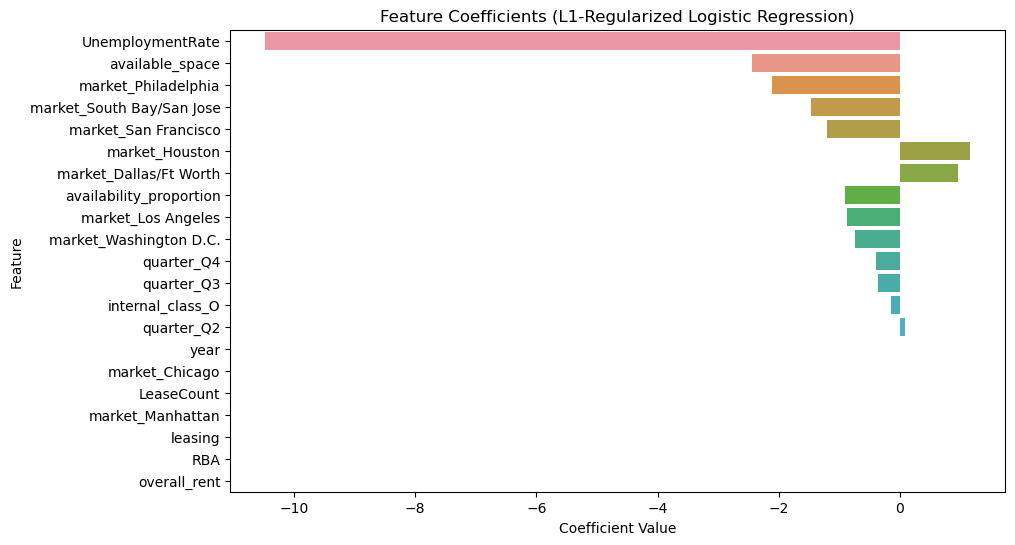

In [66]:
# --- 4. Train-Test Split ---
# Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=42, stratify=y)
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

# --- 5. Preliminary Feature Selection Exploration ---
# For example, fitting a Logistic Regression with L1 penalty (LASSO) to see which predictors have non-zero coefficients.
# (You may need to install or import libraries from scikit-learn.)
logreg = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
logreg.fit(X_train, y_train)
coef_df = pd.DataFrame({
    "feature": X_train.columns,
    "coefficient": logreg.coef_[0]
}).sort_values(by="coefficient", key=lambda x: np.abs(x), ascending=False)
print("Feature Coefficients from L1-Regularized Logistic Regression:")
print(coef_df)

# Optional: Plot the coefficients
plt.figure(figsize=(10,6))
sns.barplot(data=coef_df, x="coefficient", y="feature", orient="h")
plt.title("Feature Coefficients (L1-Regularized Logistic Regression)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

- **High Influence of Unemployment:** The large negative coefficient on unemployment rate suggests higher unemployment strongly decreases the likelihood of high occupancy, making it the most influential predictor in the model.

- **Market-Specific Effects:** Markets like Philadelphia and Houston show notably positive coefficients, indicating a higher propensity toward high occupancy there, while others (e.g., Washington D.C.) appear less impactful in this model.

- **Low Multicollinearity & Minor Predictors:** VIF results suggest that none of the numeric features exhibit dangerously high collinearity, and factors like LeaseCount, RBA, or year show minimal net influence once the L1 penalty zeroes out less important predictors.